## Extracting Nino 3.4 biomass

In this example, we show how to plot the time-series of total biomass over the Nino 3.4 area.

In [1]:
import os
import apecosm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [2]:
mesh_file = os.path.join('..', 'data', 'pacific_mesh_mask.nc')

In [3]:
mesh = apecosm.open_mesh_mask(mesh_file)

In [4]:
dirin = os.path.join('..', 'data', 'apecosm')

In [5]:
const = apecosm.open_constants(dirin)

In [6]:
data = apecosm.open_apecosm_data(dirin, replace_dims={'community': 'c'})

Now, we extract the Nino 3.4 area, as described in [https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni)

In [7]:
lon = mesh['glamt']

In [8]:
lat = mesh['gphit']

In [9]:
tmask = mesh['tmaskutil']

In [10]:
nino_mask = (abs(lat) <= 5) & (lon <= -120) & (lon >= -170) & (tmask > 0)
nino_mask = nino_mask.astype(int)

Now let's check that the area is properly set:

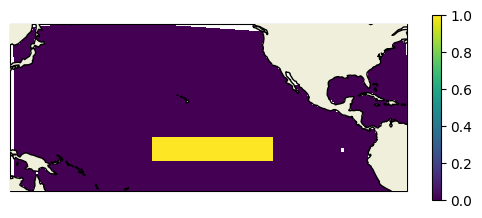

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs = apecosm.plot_pcolor_map(nino_mask, mesh)
cb = plt.colorbar(cs, shrink=0.5)

Now we extract the spatial **mean** biomass density (in $J.kg^{-1}.m^{-2}$) over the area:

In [12]:
oope_nino_34 = apecosm.extract_oope_data(data['OOPE'], mesh, mask_dom=nino_mask)
oope_nino_34 = oope_nino_34.compute()

We convert the spatial mean into a spatial **integral** (in $J.kg^{-1}$)

In [13]:
oope_nino_34 = apecosm.spatial_mean_to_integral(oope_nino_34)

Now we integrate over the full size-spectrum:

In [14]:
biomass_nino_34 = apecosm.extract_oope_size_integration(oope_nino_34, const)

Finally, we sum over the community (`c`) dimension to extract the total biomass over the Nino 3.4 area:

In [15]:
total_biomass_nino_34 = biomass_nino_34.sum(dim='c')

Now we can draw the time-series as follows:

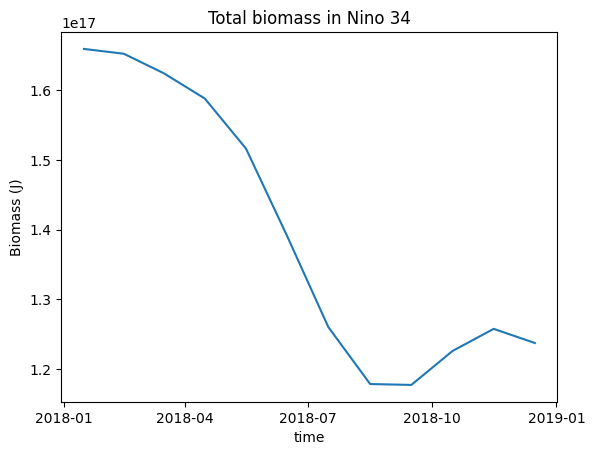

In [16]:
ax = plt.gca()
total_biomass_nino_34.plot()
ax.set_title('Total biomass in Nino 34')
label = ax.set_ylabel('Biomass (J)')